# This notebook gives an introduction to the xcube's "zenodo" data store and its preload_data method

This notebook shows an example how to preload compressed files published on the [https://zenodo.org](https://zenodo.org) webpage. The compressed files will be downloaded, unpacked and stored in the cache data store, which can be subsequently used by the data store as usual. 

### Setup
In order to run this notebook, you need to install [`xcube_zenodo`](https://github.com/xcube-dev/xcube-zenodo), following the [README](../README.md).

Note that [`xcube_zenodo`](https://github.com/xcube-dev/xcube-zenodo) is a plugin of [`xcube`](https://xcube.readthedocs.io/en/latest/), where `xcube` is included in the `environment.yml`.  

Now, we first import everything we need:

In [1]:
from xcube.core.store import new_data_store

We initiate a zenodo [data store](https://xcube.readthedocs.io/en/latest/dataaccess.html#data-store-framework) for the record https://zenodo.org/records/12698637 with the record ID `root="12698637"`. Note that the `xcube-zenodo` plugin is recognized after installation by setting the first argument to `"zenodo"` in the `new_data_store` function. We can optionally specify the cache data store's ID and parameters using the `cache_store_id` and `cache_store_params` keyword arguments. By default, `cache_store_id` is set to `file`, and `cache_store_params` defaults to `dict(root="zenodo_cache/12698637", max_depth=10)`.

In [2]:
%%time
store = new_data_store("zenodo", root="12698637")

CPU times: user 133 ms, sys: 27.2 ms, total: 160 ms
Wall time: 166 ms


We can list the data IDs, which already tell us that we need to preload the data, since the available files in the records are all zip files. If the user tries to use `open_data()` to access a compressed data source, the store will raise an error and notify the user that `preload_data()` may be used.  

In [3]:
%%time
store.list_data_ids()

CPU times: user 12.9 ms, sys: 3.96 ms, total: 16.8 ms
Wall time: 583 ms


['2001-2005_HDF.rar',
 '2021-2023_TIFF.rar',
 '2006-2010_TIFF.rar',
 '2016-2020_TIFF.rar',
 '2016-2020_HDF.rar',
 '2011-2015_TIFF.rar',
 '2011-2015_HDF.rar',
 '2006-2010_HDF.rar',
 '2001-2005_TIFF.rar',
 '1991-2000_TIFF.rar',
 '1991-2000_HDF.rar',
 '1981-1990_TIFF.rar',
 '1981-1990_HDF.rar',
 '2021-2023_HDF.rar']

Compressed files can be preloaded using the `preload_data` method. This approach enables the downloading of compressed files that cannot be lazily loaded, allowing them to be stored and readily available for the duration of the project. Also this method uses `preload_params`, which can be viewed in the next cell.

In [4]:
%%time
preload_params = store.get_preload_data_params()
preload_params

CPU times: user 141 μs, sys: 22 μs, total: 163 μs
Wall time: 172 μs


The `preload_data` method returns a store which may be used subsequently to access the preloaded data, as shown in the subsequent cells. If no data IDs are given, all available data in compressed format will be preloaded. Note that the `preload_method` is new and highly experimental. 

In [5]:
cache_store = store.preload_data("2021-2023_TIFF.rar")

The data IDs can be view by listing the data IDs of the cache store, which is returned by the `preload_data` method. Note that in this example the compressed file contains multiple files. Each file is written to a Zarr file and the data ID is extended by the individual file names where the file extension is adjusted. 

In [7]:
cache_store.list_data_ids()

['liechtenstein/disturbance_agent_1985_2023_liechtenstein.zarr',
 'liechtenstein/number_disturbances_liechtenstein.zarr',
 'liechtenstein/latest_disturbance_liechtenstein.zarr',
 'liechtenstein/disturbance_probability_1985_2023_liechtenstein.zarr',
 'liechtenstein/annual_disturbances_1985_2023_liechtenstein.zarr',
 'liechtenstein/greatest_disturbance_liechtenstein.zarr',
 'liechtenstein/disturbance_agent_aggregated_liechtenstein.zarr',
 'liechtenstein/forest_mask_liechtenstein.zarr',
 'liechtenstein/disturbance_severity_1985_2023_liechtenstein.zarr',
 'andorra/disturbance_severity_1985_2023_andorra.zarr',
 'andorra/number_disturbances_andorra.zarr',
 'andorra/disturbance_agent_1985_2023_andorra.zarr',
 'andorra/annual_disturbances_1985_2023_andorra.zarr',
 'andorra/latest_disturbance_andorra.zarr',
 'andorra/disturbance_probability_1985_2023_andorra.zarr',
 'andorra/disturbance_agent_aggregated_andorra.zarr',
 'andorra/forest_mask_andorra.zarr',
 'andorra/greatest_disturbance_andorra.z

Next we want to open one of the datasets. We first view the availbale parameters to open the data. 

In [8]:
%%time
open_params = cache_store.get_open_data_params_schema(data_id="andorra/disturbance_probability_1985_2023_andorra.zarr")
open_params

CPU times: user 866 μs, sys: 0 ns, total: 866 μs
Wall time: 870 μs


In [9]:
%%time
ds = cache_store.open_data("andorra/disturbance_probability_1985_2023_andorra.zarr")
ds

CPU times: user 62.8 ms, sys: 2.96 ms, total: 65.8 ms
Wall time: 65.2 ms


<xarray.Dataset> Size: 348MB
Dimensions:      (y: 971, x: 1149)
Coordinates:
    spatial_ref  int64 8B ...
  * x            (x) float64 9kB 3.613e+06 3.613e+06 ... 3.647e+06 3.647e+06
  * y            (y) float64 8kB 2.214e+06 2.214e+06 ... 2.185e+06 2.185e+06
Data variables: (12/39)
    band_1       (y, x) float64 9MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_10      (y, x) float64 9MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_11      (y, x) float64 9MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_12      (y, x) float64 9MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_13      (y, x) float64 9MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_14      (y, x) float64 9MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    ...           ...
    band_4       (y, x) float64 9MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_5       (y, x) float64 9MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_6       (y, x) float64 9MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_7       (y, x) float64 9MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_8       (y, x) float64 9MB dask.array<chunksize=(512, 512), meta=np.ndarray>
    band_9       (y, x) float64 9MB dask.array<chunksize=(512, 512), meta=np.ndarray>
Attributes:
    source:   file:///home/konstantin/bc_kon/01_coding/01_github/xcube-zenodo...

We plot parts of the opened data as an example below.

CPU times: user 320 ms, sys: 36.7 ms, total: 356 ms
Wall time: 346 ms


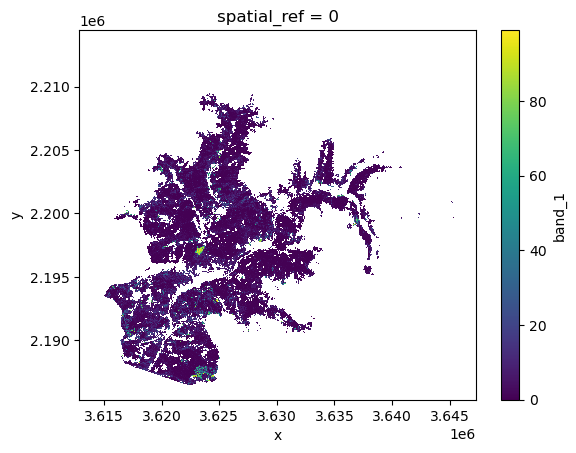

In [10]:
%%time
ds.band_1.plot()